In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
from correlation import *
import matplotlib.pyplot as plt
from NAN_Pattern_Decomposition import decompose_dataset_according_to_NAN_pattern


%load_ext autoreload
%autoreload 2

### load Data

In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=False)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (250000,)
X has shape (250000, 30)


-> we can observe some (3 at all) different patterns of NAN values -> essayer de déterminer si ces values ont une corrélation avec le label:
- pattern 1: feature 0: 840 NAN -> 16.8% NAN
- pattern 2: features 23,24,25: 1985 NAN -> 39.7% NAN
- pattern 3: features 4,5,6,12,26,27,28: 3525 NAN -> 70.5 % NAN


Also :
- 562 samples de p1 font parti de p2.
- 734 samples de p1 font parti de p3.
- 0 samples de p2 font parti de p1.
- 1423 sample de p2 font parti de p3
- 0 samples de p3 font parti de p1.
- 0 samples de p3 font parti de p2.

Also:
- p2 inter p3 = 1985
- p1 union p3 union p2 = 3631

In [3]:
tx_nan = transform_to_nan(tx, -900)

In [4]:

p0_ind, p0, y0, p1_ind, p1, y1, p2_ind, p2, y2, p3_ind, p3, y3 = decompose_dataset_according_to_NAN_pattern(tx_nan, y)

# Feature Engineering

In [5]:
def basic_features_process(tx):
    
    tx_nan_mean, nan_mean = transform_to_mean(tx)
    
    features_square = [6]
    tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

    features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
    tx_log = transform_feature_log(tx_square, features_log)

    features_sin = [11, 12, 14, 15, 17]
    tx_angle_stand = standardize_angles(tx_log, features_sin)
    tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

    feature_std = features_log
    tx_std, mean, std = standardize_features(tx_sin, feature_std)

    tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
    tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
    tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
    tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)
    
    return tx_22plus3, nan_mean

## Pattern 0 (No NAN values)

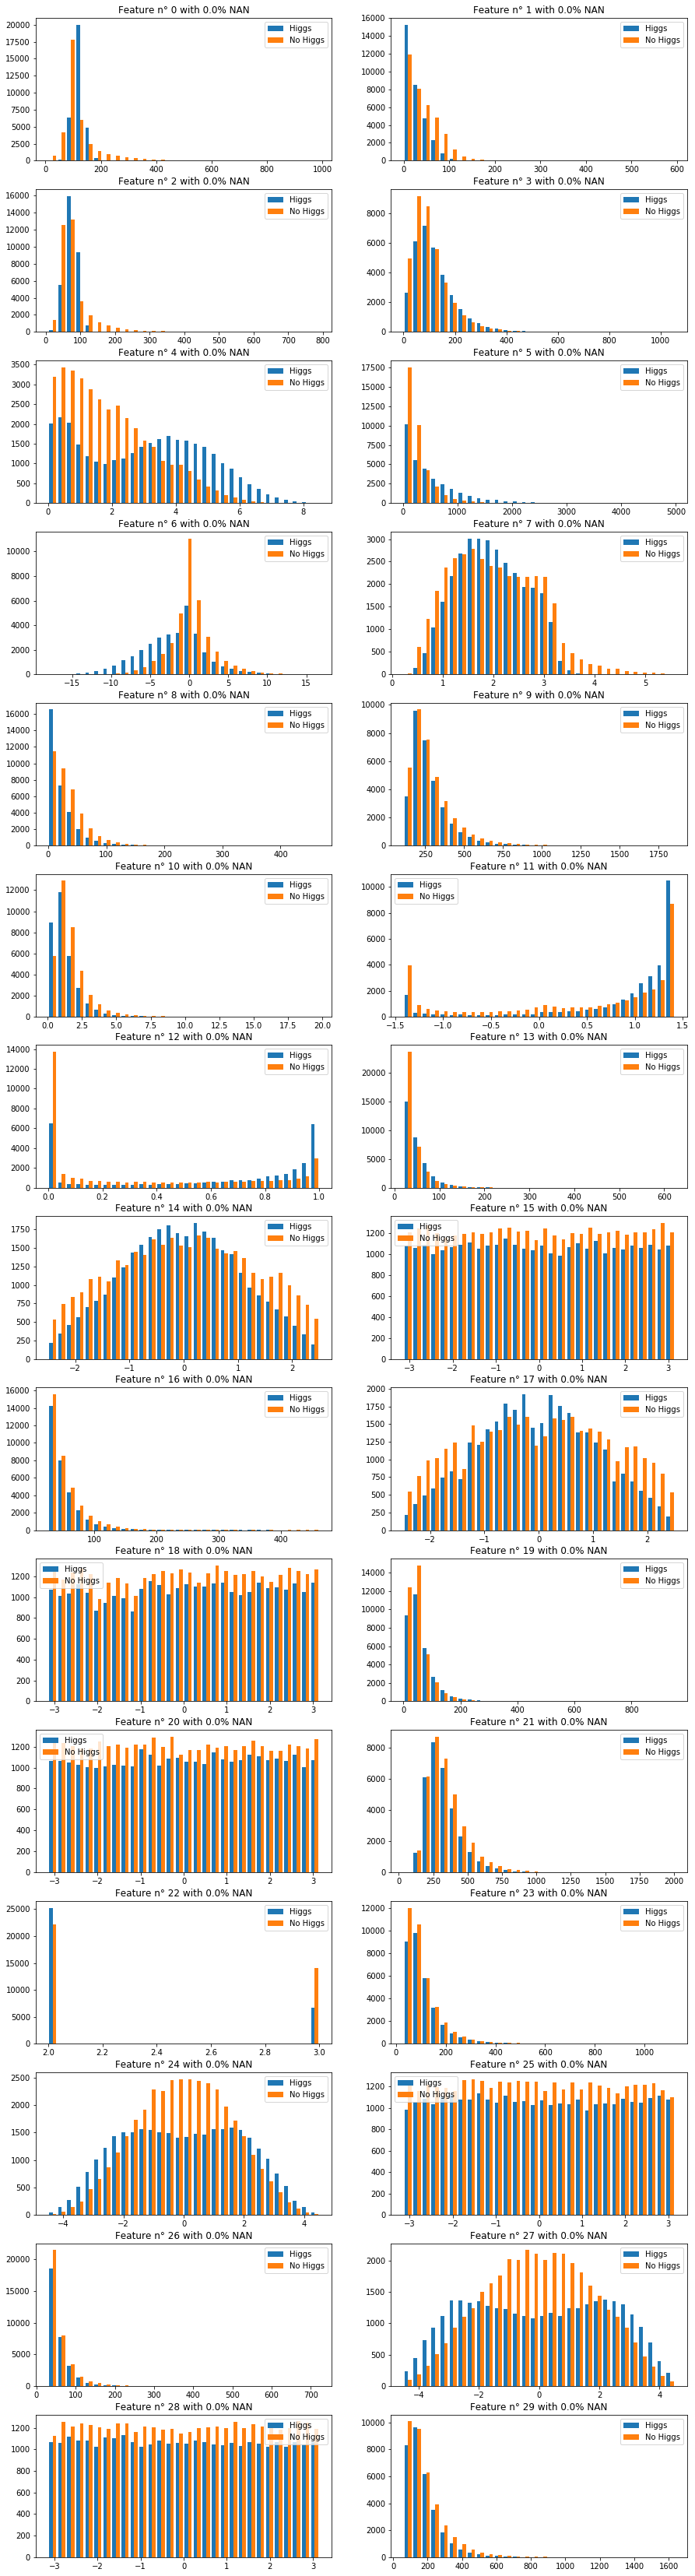

In [235]:
display_feature_distribution(y0, p0, 30)

In [6]:
p0_processed, nan_mean0 = basic_features_process(p0)
p0_processed.shape

(68114, 34)

## Pattern 1 (Feature 0)

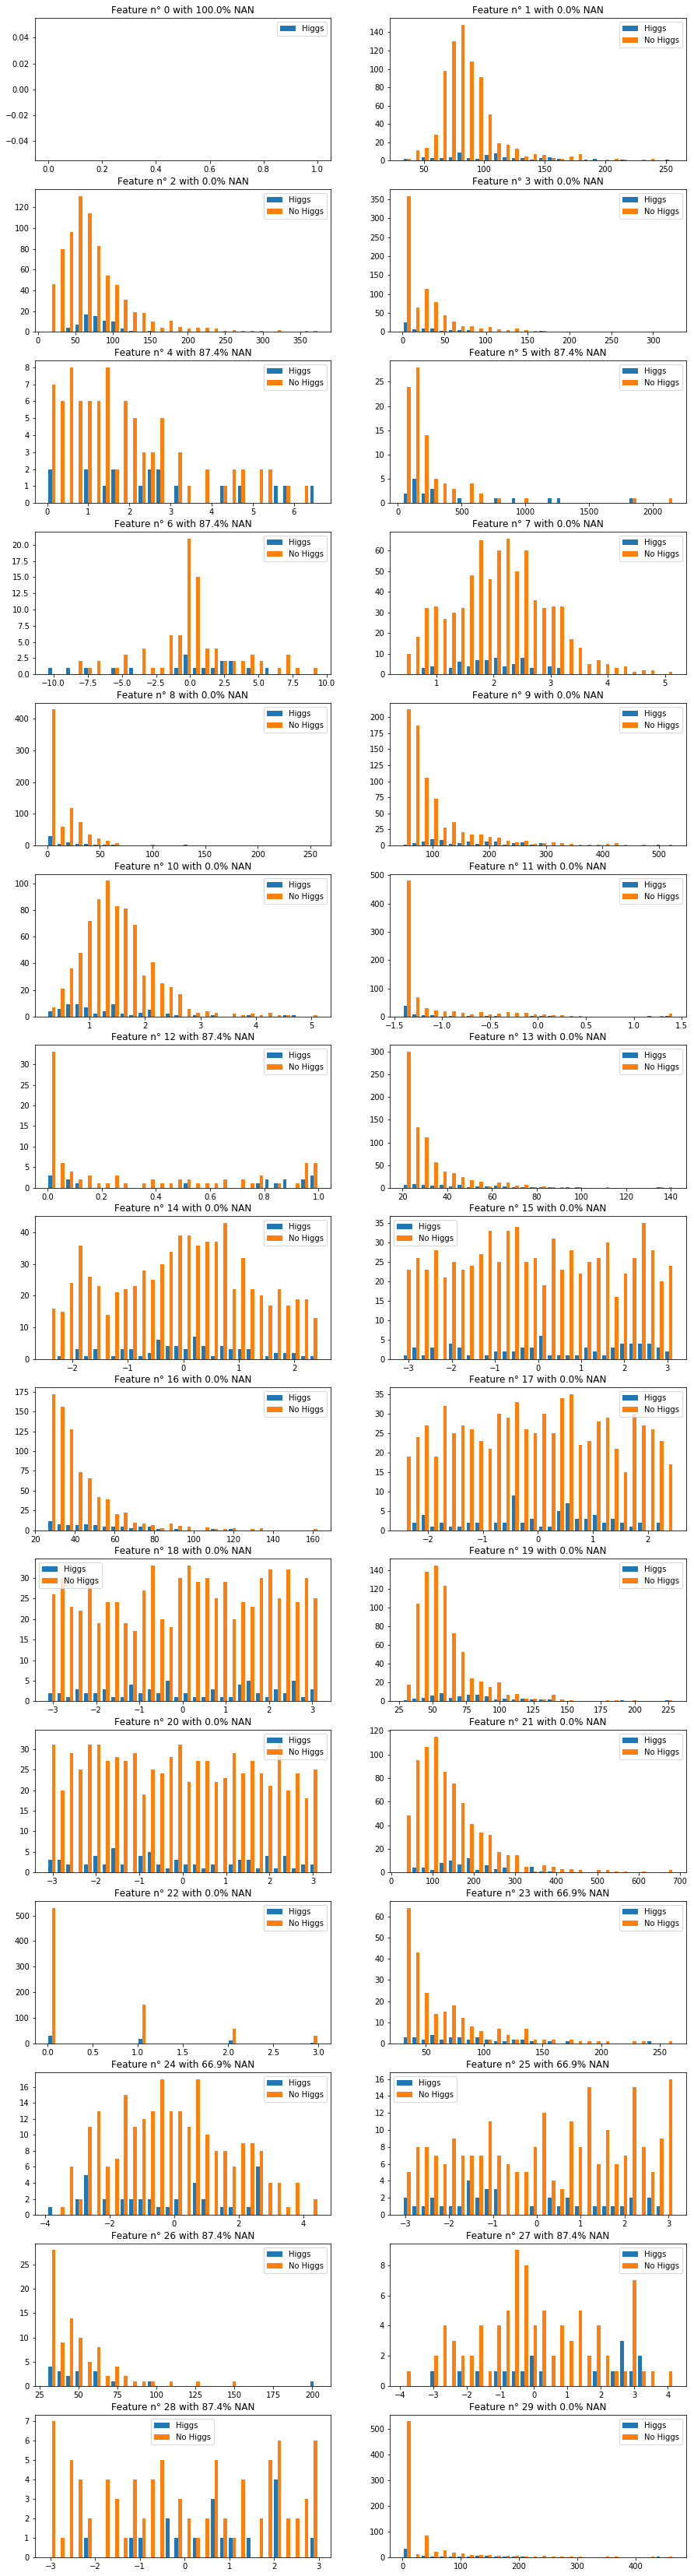

In [8]:
display_feature_distribution(y1, p1, 30)

In [27]:
p1_processed, nan_mean1 = basic_features_process(p1)
p1_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:99: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:102: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(standfeature))


(38114, 34)

## Pattern 2 (Feature 23)

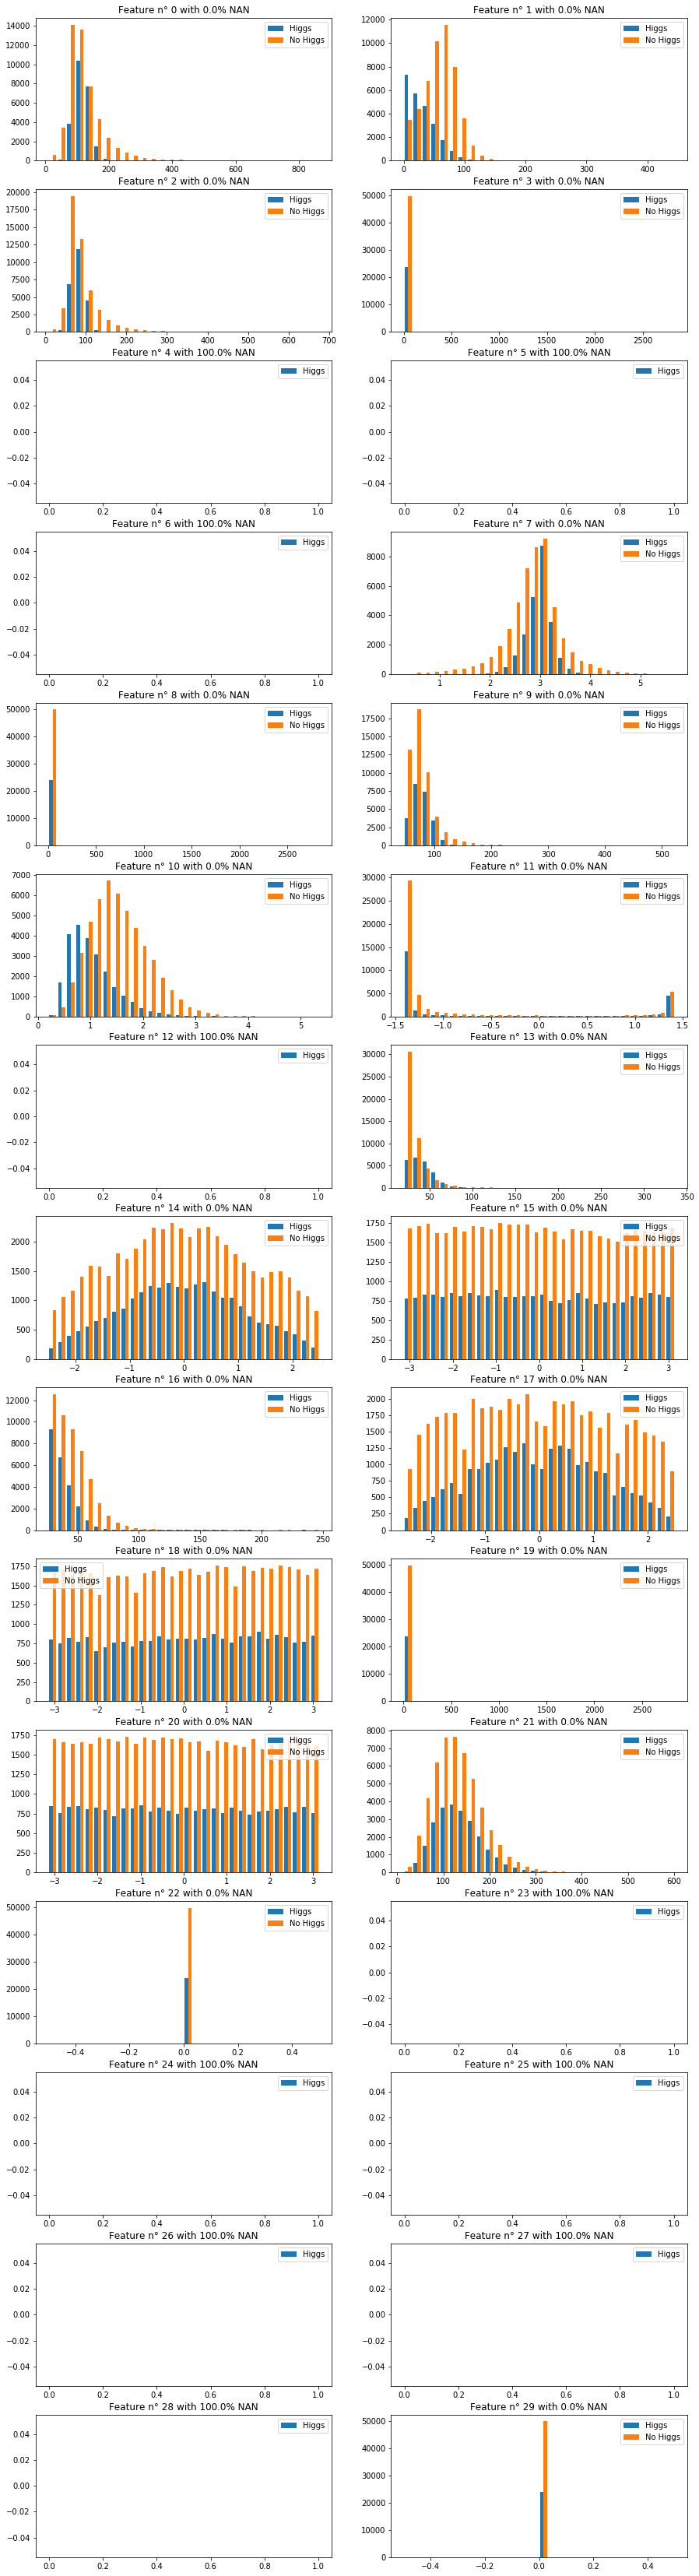

In [8]:
display_feature_distribution(y2, p2, 30)

In [9]:
p2_processed, nan_mean2 = basic_features_process(p2)
p2_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:99: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:102: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/ML/local/projects/project1/features_engineering.py:54: RuntimeWarning: All-NaN slice encountered
  standfeature = (standfeature - np.nanmin(standfeature) - np.pi)/ (np.nanmax(standfeature) - np.nanmin(standfeature)) * 2 * np.pi
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(stand

(73790, 34)

## Pattern 3 (Feature 28)

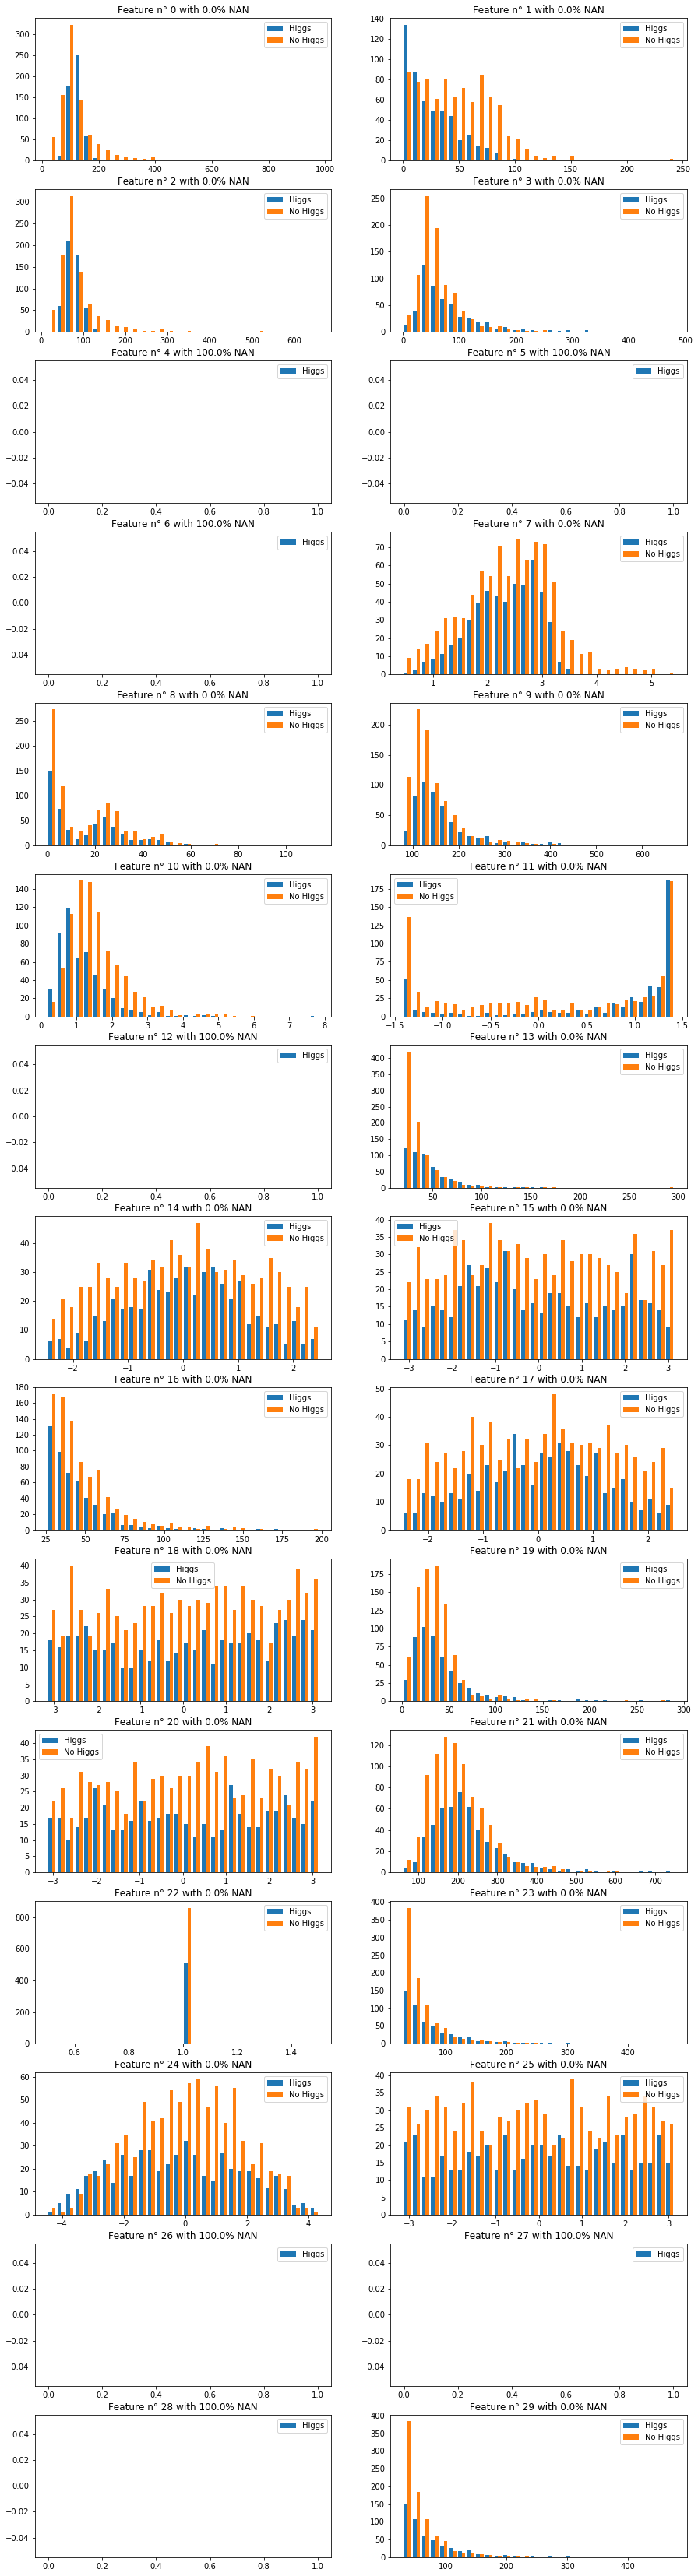

In [12]:
display_feature_distribution(y3, p3, 30)

In [10]:
p3_processed, nan_mean3 = basic_features_process(p3)
p3_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:99: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:102: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/ML/local/projects/project1/features_engineering.py:54: RuntimeWarning: All-NaN slice encountered
  standfeature = (standfeature - np.nanmin(standfeature) - np.pi)/ (np.nanmax(standfeature) - np.nanmin(standfeature)) * 2 * np.pi
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(stand

(69982, 34)

# Train Models 

In [14]:
from train_model import *

## P0

In [11]:
feature_nans = [22]
p0_processed = np.delete(p0_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.741, Lambda : 1e-10


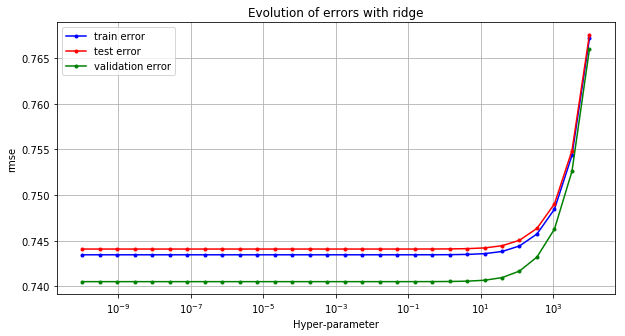

In [341]:
ridge_regression_exploration(y0, p0_processed, 0.8, np.logspace(-10, 4, 30))

Gradient Descent, Loss : 0.815, Lambda : 0.0007880462815669905


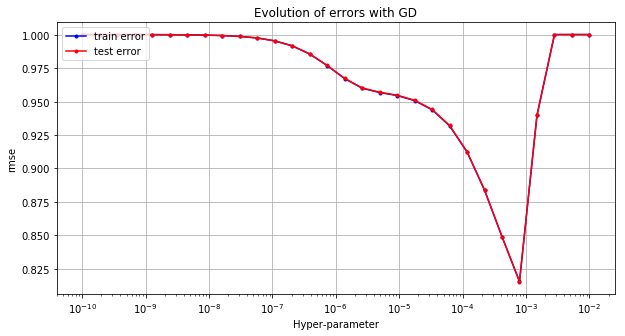

In [340]:
max_iter = 500
initial_w = np.zeros(p0_processed.shape[1])
gradient_descent_exploration(y0, p0_processed, 0.8, np.logspace(-10, -2, 30), initial_w, max_iter)

In [ ]:
from train_model import *
max_iter = 2000
initial_w = np.zeros(p0_processed.shape[1])
logistic_stochastic_gradient_descent_exploration(y0, p0_processed, 0.8, np.logspace(-10, -2, 10), 1, initial_w, max_iter)

In [72]:
_, ws0_best = log_stochastic_gradient_descent(y0, p0_processed, initial_w, 1, max_iter, 1.6e-4)

SGD(0/1999): loss=0.6931471805589208, w0=0.0, w1=0.0
SGD(400/1999): loss=-4.6070332318253175, w0=0.01115500389382911, w1=-0.4841067237686519
SGD(800/1999): loss=-12.427419423988681, w0=0.020948321184252997, w1=-1.2968910856179288
SGD(1200/1999): loss=-15.482779934520249, w0=0.02950004650453188, w1=-1.6127492108945398
SGD(1600/1999): loss=-22.18605400785666, w0=0.040365002684426055, w1=-2.3107910186193243


In [73]:
ws0_best = ws0_best[-1]

## P1

In [28]:
feature_nans = [0, 22]
p1_processed = np.delete(p1_processed, feature_nans, axis = 1)

Gradient Descent, Loss : 0.815, Lambda : 0.0007880462815669905


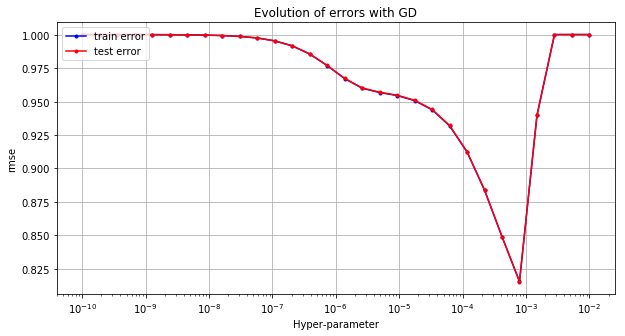

In [29]:
max_iter = 500
initial_w = np.zeros(p0_processed.shape[1])
gradient_descent_exploration(y0, p0_processed, 0.8, np.logspace(-10, -2, 30), initial_w, max_iter)

Ridge Resgression, Loss : 0.256, Lambda : 1e-10


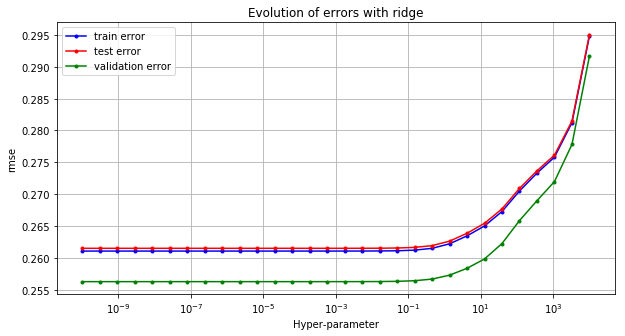

In [32]:
ridge_regression_exploration(y1, p1_processed, 0.8, np.logspace(-10, 4, 30))

SGD(0/1999): loss=0.6931471805596882, w0=0.0, w1=0.0
SGD(400/1999): loss=0.4494110694600753, w0=-0.009146278179590918, w1=2.5079738708895254e-05
SGD(800/1999): loss=0.373024609951613, w0=-0.01481780181343066, w1=4.92878271507292e-05
SGD(1200/1999): loss=0.3503511518334451, w0=-0.017702048261145457, w1=6.974784961642499e-05
SGD(1600/1999): loss=0.337886467280642, w0=-0.020171195449439138, w1=8.099351417818305e-05
SGD(0/1999): loss=0.6931471805596882, w0=0.0, w1=0.0
SGD(400/1999): loss=0.3657577283796198, w0=-0.015620506231456055, w1=5.73437055781793e-05
SGD(800/1999): loss=0.33213182695764004, w0=-0.022026444352189107, w1=9.813857482827148e-05
SGD(1200/1999): loss=0.33179362854848893, w0=-0.02215820859127572, w1=0.0001375599122758389
SGD(1600/1999): loss=0.3283566808663674, w0=-0.02486839426868037, w1=0.00018028006683385751
SGD(0/1999): loss=0.6931471805596882, w0=0.0, w1=0.0
SGD(400/1999): loss=0.3286773131690294, w0=-0.024359286005599966, w1=6.1576513076751e-05
SGD(800/1999): loss=0.3

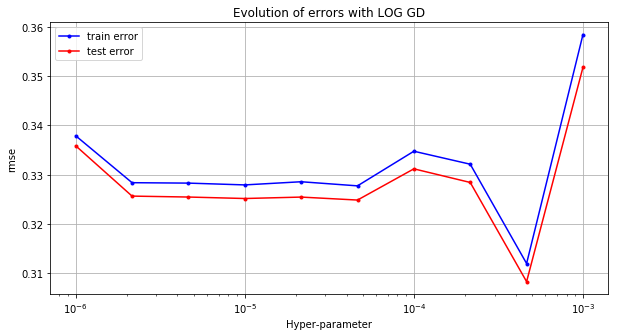

In [36]:
from train_model import *
max_iter = 2000
initial_w = np.zeros(p1_processed.shape[1])
logistic_stochastic_gradient_descent_exploration(y1, p1_processed, 0.8, np.logspace(-6, -3, 10), 1, initial_w, max_iter)

In [76]:
initial_w = np.zeros(p1_processed.shape[1])

_, ws1_best = log_stochastic_gradient_descent(y1, p1_processed, initial_w, 1, max_iter, 4e-4)

SGD(0/1999): loss=0.6931471805594103, w0=0.0, w1=0.0
SGD(400/1999): loss=-883.4008528561367, w0=-12.133895581851224, w1=0.0031810088505304524
SGD(800/1999): loss=-1728.1430564237346, w0=-23.736419981851228, w1=0.014507640817008503
SGD(1200/1999): loss=-2540.838545953461, w0=-34.89894158185121, w1=0.024536683334826944
SGD(1600/1999): loss=-3401.9527008238983, w0=-46.726627981851166, w1=0.02899657123881793


In [77]:
ws1_best = ws1_best[-1]

## P2

In [43]:
feature_nans = [4,5,6,12,22, 23 ,24, 25, 26,27,28]
p2_processed = np.delete(p2_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.638, Lambda : 1e-10


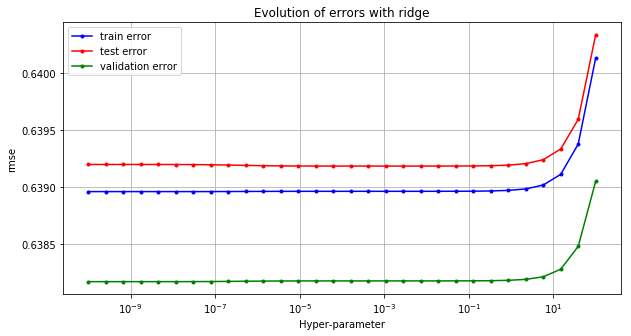

In [44]:
ridge_regression_exploration(y2, p2_processed, 0.8, np.logspace(-10, 2, 30))

/home/hadrien/ML/local/projects/project1/ML_methods.py:267: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * grad


Gradient Descent, Loss : 0.684, Lambda : 0.00041753189365604


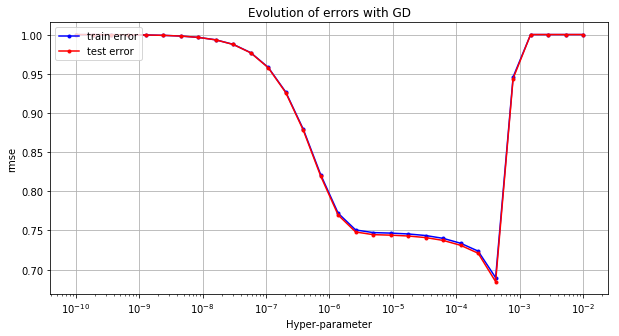

In [45]:
max_iter = 500
initial_w = np.zeros(p2_processed.shape[1])
gradient_descent_exploration(y2, p2_processed, 0.8, np.logspace(-10, -2, 30), initial_w, max_iter)

SGD(0/1999): loss=0.6931471805590165, w0=0.0, w1=0.0
SGD(400/1999): loss=0.5783406755338864, w0=0.0017705611893931038, w1=-0.03492659344828429
SGD(800/1999): loss=0.5510290689078067, w0=0.003730598295368082, w1=-0.027867178066990753
SGD(1200/1999): loss=0.5566339486765141, w0=0.0035547291276613316, w1=-0.03143549915457935
SGD(1600/1999): loss=0.5504802492089826, w0=0.004369926010377909, w1=-0.03067801062532858
SGD(0/1999): loss=0.6931471805590165, w0=0.0, w1=0.0
SGD(400/1999): loss=0.5490495232047664, w0=0.0035953261950901864, w1=-0.02824417656769189
SGD(800/1999): loss=0.6159198297984715, w0=0.005452091037070404, w1=-0.04630104285306616
SGD(1200/1999): loss=0.5488428295986649, w0=0.007249435161479784, w1=-0.03383102276896508
SGD(1600/1999): loss=0.5773131497669227, w0=0.013905625744063893, w1=-0.043008488200969176
SGD(0/1999): loss=0.6931471805590165, w0=0.0, w1=0.0
SGD(400/1999): loss=0.5772008746201817, w0=0.002308164403429332, w1=-0.04215581158775513
SGD(800/1999): loss=0.710654074

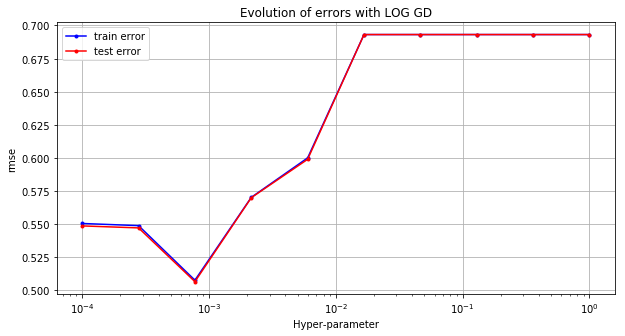

In [47]:
from train_model import *
max_iter = 2000
initial_w = np.zeros(p2_processed.shape[1])
logistic_stochastic_gradient_descent_exploration(y2, p2_processed, 0.8, np.logspace(-4, 0, 10), 1, initial_w, max_iter)

In [78]:
ws2_best = ridge_regression(y2, p2_processed, 1e-3)

## P3

In [49]:
feature_nans = [4,5,6,12,22, 26,27,28]
p3_processed = np.delete(p3_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.789, Lambda : 41.753189365604086


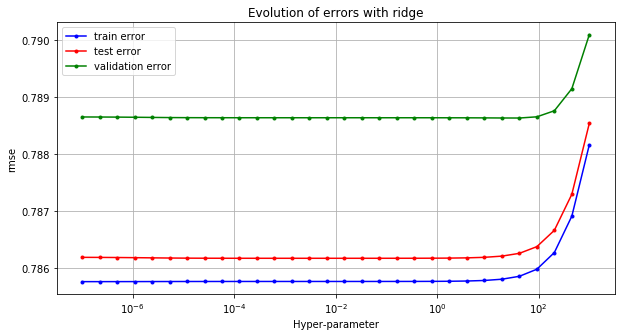

In [50]:
ridge_regression_exploration(y3, p3_processed, 0.8, np.logspace(-7, 3, 30))

Gradient Descent, Loss : 0.834, Lambda : 0.0007880462815669905


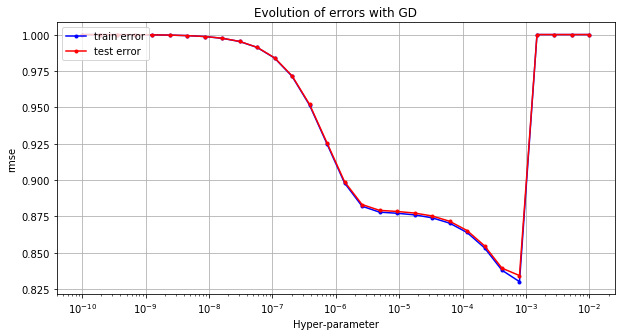

In [51]:
max_iter = 500
initial_w = np.zeros(p3_processed.shape[1])
gradient_descent_exploration(y3, p3_processed, 0.8, np.logspace(-10, -2, 30), initial_w, max_iter)

SGD(0/1999): loss=0.6931471805590554, w0=0.0, w1=0.0
SGD(400/1999): loss=0.6289533336079619, w0=0.0032700129898602173, w1=-0.02051222638662319
SGD(800/1999): loss=0.622221143931292, w0=0.006202855709243876, w1=-0.015875457998954404
SGD(1200/1999): loss=0.6227403834102372, w0=0.009121169626908485, w1=-0.019481160966655035
SGD(1600/1999): loss=0.6191710430537909, w0=0.012300188295937714, w1=-0.01774491623965614
SGD(0/1999): loss=0.6931471805590554, w0=0.0, w1=0.0
SGD(400/1999): loss=0.751242755262696, w0=0.013590008699090191, w1=-0.045770264385031796
SGD(800/1999): loss=0.6448320574284877, w0=0.02400897837133725, w1=-0.029766658370697665
SGD(1200/1999): loss=0.6287385393128517, w0=0.029884833039526777, w1=-0.008073812500023946
SGD(1600/1999): loss=0.637115066586596, w0=0.03773679450402138, w1=-0.031088891258350366
SGD(0/1999): loss=0.6931471805590554, w0=0.0, w1=0.0
SGD(400/1999): loss=0.6474448829643487, w0=0.021817315801452908, w1=-0.03163290001267345
SGD(800/1999): loss=0.667210246706

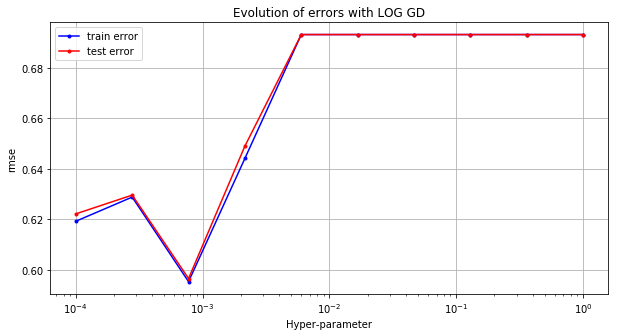

In [52]:
from train_model import *
max_iter = 2000
initial_w = np.zeros(p3_processed.shape[1])
logistic_stochastic_gradient_descent_exploration(y3, p3_processed, 0.8, np.logspace(-4, 0, 10), 1, initial_w, max_iter)

In [82]:
initial_w = np.zeros(p3_processed.shape[1])

_, ws3_best = log_stochastic_gradient_descent(y3, p3_processed, initial_w, 1, max_iter, 4e-4)

SGD(0/1999): loss=0.6931471805589041, w0=0.0, w1=0.0
SGD(400/1999): loss=-55.985878729390755, w0=0.046197430169942995, w1=-3.1305337645905453
SGD(800/1999): loss=-117.58545811413224, w0=0.08533967622907077, w1=-6.574605582448392
SGD(1200/1999): loss=-159.39494664316425, w0=0.11660976357025438, w1=-8.912623453299062
SGD(1600/1999): loss=-198.7394446997183, w0=0.1547603936385213, w1=-11.111035304863998


In [83]:
ws3_best=ws3_best[-1]
ws3_best.shape

(26,)

# Test Models

In [84]:
y_te, tx_te, ids_te = load_csv_data("data_csv/test.csv", sub_sample=False)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (250000,)
X has shape (250000, 30)


In [85]:
tx_te_nan = transform_to_nan(tx_te, -900)
p0_ind_te, p0_te, y0_te, p1_ind_te, p1_te, y1_te, p2_ind_te, p2_te, y2_te, p3_ind_te, p3_te, y3_te = decompose_dataset_according_to_NAN_pattern(tx_te_nan, y_te)

In [86]:
def basic_features_process_te(tx, nan_mean):
    
    tx_nan_mean, nan_mean = transform_to_mean(tx)
    
    features_square = [6]
    tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

    features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
    tx_log = transform_feature_log(tx_square, features_log)

    features_sin = [11, 12, 14, 15, 17]
    tx_angle_stand = standardize_angles(tx_log, features_sin)
    tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

    feature_std = features_log
    tx_std, mean, std = standardize_features(tx_sin, feature_std)

    tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
    tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
    tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
    tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)
    
    return tx_22plus3

In [87]:
p0_te_processed = basic_features_process_te(p0_te, nan_mean0)
p1_te_processed = basic_features_process_te(p1_te, nan_mean1)
p2_te_processed = basic_features_process_te(p2_te, nan_mean2)
p3_te_processed = basic_features_process_te(p3_te, nan_mean3)

feature_nans = [22]
p0_te_processed = np.delete(p0_te_processed, feature_nans, axis = 1)

feature_nans = [0, 22]
p1_te_processed = np.delete(p1_te_processed, feature_nans, axis = 1)

feature_nans = [4,5,6,12,22, 23 ,24, 25, 26,27,28]
p2_te_processed = np.delete(p2_te_processed, feature_nans, axis = 1)

feature_nans = [4,5,6,12,22, 26,27,28]
p3_te_processed = np.delete(p3_te_processed, feature_nans, axis = 1)


/home/hadrien/ML/local/projects/project1/ML_methods.py:99: RuntimeWarning: Mean of empty slice
  
/home/hadrien/ML/local/projects/project1/ML_methods.py:102: RuntimeWarning: Mean of empty slice
  
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(standfeature))
/home/hadrien/ML/local/projects/project1/features_engineering.py:54: RuntimeWarning: All-NaN slice encountered
  standfeature = (standfeature - np.nanmin(standfeature) - np.pi)/ (np.nanmax(standfeature) - np.nanmin(standfeature)) * 2 * np.pi


In [88]:
p0_te_processed.shape

(155460, 33)

In [89]:
labels0 = predict_labels_logi(ws0_best, p0_te_processed)
labels1 = predict_labels_logi(ws1_best, p1_te_processed)
labels2 = predict_labels_logi(ws2_best, p2_te_processed)
labels3 = predict_labels_logi(ws3_best, p3_te_processed)

labels = np.nan*np.zeros(tx_te.shape[0])
labels[p0_ind_te] = labels0
labels[p1_ind_te] = labels1
labels[p2_ind_te] = labels2
labels[p3_ind_te] = labels3

In [90]:
### check all values are assigned correctly
np.count_nonzero(np.isnan(labels))

0

# Create CSV

In [91]:
### We aim to categorize that much sample as NON-HIGGS
print("We have {0}% non higgs samples, we aim for 65%.".format( round(np.count_nonzero(labels[labels == -1])/tx_te.shape[0]*100), 2))

We have 71% non higgs samples, we aim for 65%.


In [92]:
create_csv_submission(ids_te, labels, 'Sixth')

In [93]:
labels

array([-1., -1.,  1., ...,  1., -1.,  1.])